## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  31.689945  1288.157056  0.923987   6.197185  1.590453
1   7.905040   400.781113  0.877810  10.727128  1.616717
2  25.890020  1630.625434  0.897919   8.221538  1.682430
3  68.860071  1338.157590  0.536263   5.248759  1.458062
4  11.518411  1026.779489  0.663494   8.994962  1.722735


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0445957	total: 69.1ms	remaining: 1m 9s
1:	learn: 1.0388418	total: 69.7ms	remaining: 34.8s
2:	learn: 1.0327914	total: 70.2ms	remaining: 23.3s
3:	learn: 1.0242431	total: 70.9ms	remaining: 17.6s
4:	learn: 1.0165796	total: 71.5ms	remaining: 14.2s
5:	learn: 1.0107099	total: 72.1ms	remaining: 11.9s
6:	learn: 1.0036840	total: 72.5ms	remaining: 10.3s
7:	learn: 0.9963334	total: 73.1ms	remaining: 9.06s
8:	learn: 0.9883593	total: 73.6ms	remaining: 8.11s
9:	learn: 0.9804566	total: 74.2ms	remaining: 7.34s
10:	learn: 0.9714587	total: 74.6ms	remaining: 6.71s
11:	learn: 0.9646784	total: 75.1ms	remaining: 6.18s
12:	learn: 0.9574617	total: 75.5ms	remaining: 5.73s
13:	learn: 0.9505017	total: 76ms	remaining: 5.35s
14:	learn: 0.9442641	total: 76.4ms	remaining: 5.01s
15:	learn: 0.9374652	total: 76.8ms	remaining: 4.72s
16:	learn: 0.9298042	total: 77.3ms	remaining: 4.47s
17:	learn: 0.9246449	total: 77.8ms	remaining: 4.24s
18:	learn: 0.9172462	total: 78.2ms	remaining: 

91:	learn: 0.5917882	total: 109ms	remaining: 1.07s
92:	learn: 0.5886078	total: 109ms	remaining: 1.06s
93:	learn: 0.5855597	total: 109ms	remaining: 1.05s
94:	learn: 0.5824304	total: 110ms	remaining: 1.04s
95:	learn: 0.5793762	total: 110ms	remaining: 1.04s
96:	learn: 0.5768106	total: 110ms	remaining: 1.03s
97:	learn: 0.5730713	total: 111ms	remaining: 1.02s
98:	learn: 0.5700467	total: 111ms	remaining: 1.01s
99:	learn: 0.5668074	total: 112ms	remaining: 1s
100:	learn: 0.5624797	total: 112ms	remaining: 999ms
101:	learn: 0.5600707	total: 113ms	remaining: 993ms
102:	learn: 0.5575352	total: 113ms	remaining: 987ms
103:	learn: 0.5547899	total: 114ms	remaining: 981ms
104:	learn: 0.5517988	total: 114ms	remaining: 974ms
105:	learn: 0.5490099	total: 115ms	remaining: 968ms
106:	learn: 0.5463719	total: 115ms	remaining: 961ms
107:	learn: 0.5438726	total: 116ms	remaining: 955ms
108:	learn: 0.5411334	total: 116ms	remaining: 949ms
109:	learn: 0.5387783	total: 117ms	remaining: 944ms
110:	learn: 0.5361372	to

277:	learn: 0.2876031	total: 186ms	remaining: 483ms
278:	learn: 0.2871275	total: 186ms	remaining: 482ms
279:	learn: 0.2863019	total: 187ms	remaining: 480ms
280:	learn: 0.2856259	total: 187ms	remaining: 479ms
281:	learn: 0.2848768	total: 188ms	remaining: 478ms
282:	learn: 0.2839958	total: 188ms	remaining: 477ms
283:	learn: 0.2835237	total: 189ms	remaining: 475ms
284:	learn: 0.2823997	total: 189ms	remaining: 474ms
285:	learn: 0.2817753	total: 189ms	remaining: 473ms
286:	learn: 0.2807282	total: 190ms	remaining: 471ms
287:	learn: 0.2793930	total: 190ms	remaining: 470ms
288:	learn: 0.2787080	total: 191ms	remaining: 469ms
289:	learn: 0.2780117	total: 191ms	remaining: 468ms
290:	learn: 0.2769604	total: 192ms	remaining: 467ms
291:	learn: 0.2761334	total: 192ms	remaining: 466ms
292:	learn: 0.2756115	total: 193ms	remaining: 465ms
293:	learn: 0.2747002	total: 193ms	remaining: 464ms
294:	learn: 0.2739742	total: 194ms	remaining: 463ms
295:	learn: 0.2732823	total: 194ms	remaining: 462ms
296:	learn: 

514:	learn: 0.1550332	total: 290ms	remaining: 273ms
515:	learn: 0.1545825	total: 290ms	remaining: 272ms
516:	learn: 0.1540669	total: 291ms	remaining: 272ms
517:	learn: 0.1536086	total: 291ms	remaining: 271ms
518:	learn: 0.1531779	total: 291ms	remaining: 270ms
519:	learn: 0.1527703	total: 292ms	remaining: 269ms
520:	learn: 0.1523407	total: 292ms	remaining: 269ms
521:	learn: 0.1516780	total: 293ms	remaining: 268ms
522:	learn: 0.1512946	total: 293ms	remaining: 267ms
523:	learn: 0.1509172	total: 294ms	remaining: 267ms
524:	learn: 0.1502624	total: 294ms	remaining: 266ms
525:	learn: 0.1498003	total: 294ms	remaining: 265ms
526:	learn: 0.1494679	total: 295ms	remaining: 264ms
527:	learn: 0.1491439	total: 295ms	remaining: 264ms
528:	learn: 0.1486901	total: 295ms	remaining: 263ms
529:	learn: 0.1483149	total: 296ms	remaining: 262ms
530:	learn: 0.1479110	total: 296ms	remaining: 261ms
531:	learn: 0.1472865	total: 296ms	remaining: 261ms
532:	learn: 0.1468781	total: 297ms	remaining: 260ms
533:	learn: 

698:	learn: 0.0936926	total: 368ms	remaining: 158ms
699:	learn: 0.0933588	total: 368ms	remaining: 158ms
700:	learn: 0.0931569	total: 369ms	remaining: 157ms
701:	learn: 0.0929575	total: 369ms	remaining: 157ms
702:	learn: 0.0926865	total: 370ms	remaining: 156ms
703:	learn: 0.0925799	total: 370ms	remaining: 156ms
704:	learn: 0.0923485	total: 370ms	remaining: 155ms
705:	learn: 0.0921508	total: 371ms	remaining: 154ms
706:	learn: 0.0920227	total: 371ms	remaining: 154ms
707:	learn: 0.0918270	total: 371ms	remaining: 153ms
708:	learn: 0.0917197	total: 372ms	remaining: 153ms
709:	learn: 0.0914908	total: 372ms	remaining: 152ms
710:	learn: 0.0912970	total: 372ms	remaining: 151ms
711:	learn: 0.0911944	total: 373ms	remaining: 151ms
712:	learn: 0.0908196	total: 373ms	remaining: 150ms
713:	learn: 0.0905024	total: 374ms	remaining: 150ms
714:	learn: 0.0903105	total: 374ms	remaining: 149ms
715:	learn: 0.0901209	total: 374ms	remaining: 149ms
716:	learn: 0.0898943	total: 375ms	remaining: 148ms
717:	learn: 

945:	learn: 0.0504501	total: 472ms	remaining: 26.9ms
946:	learn: 0.0503177	total: 472ms	remaining: 26.4ms
947:	learn: 0.0501879	total: 473ms	remaining: 25.9ms
948:	learn: 0.0500635	total: 473ms	remaining: 25.4ms
949:	learn: 0.0499348	total: 474ms	remaining: 24.9ms
950:	learn: 0.0498079	total: 474ms	remaining: 24.4ms
951:	learn: 0.0496824	total: 475ms	remaining: 23.9ms
952:	learn: 0.0495580	total: 475ms	remaining: 23.4ms
953:	learn: 0.0493749	total: 475ms	remaining: 22.9ms
954:	learn: 0.0492525	total: 476ms	remaining: 22.4ms
955:	learn: 0.0490723	total: 476ms	remaining: 21.9ms
956:	learn: 0.0489572	total: 476ms	remaining: 21.4ms
957:	learn: 0.0487817	total: 477ms	remaining: 20.9ms
958:	learn: 0.0486178	total: 477ms	remaining: 20.4ms
959:	learn: 0.0484511	total: 478ms	remaining: 19.9ms
960:	learn: 0.0483306	total: 478ms	remaining: 19.4ms
961:	learn: 0.0481733	total: 478ms	remaining: 18.9ms
962:	learn: 0.0480545	total: 479ms	remaining: 18.4ms
963:	learn: 0.0479008	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

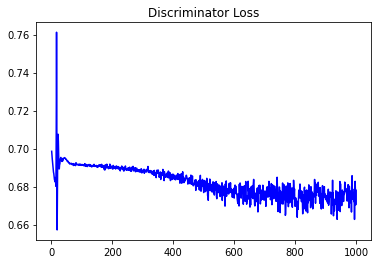

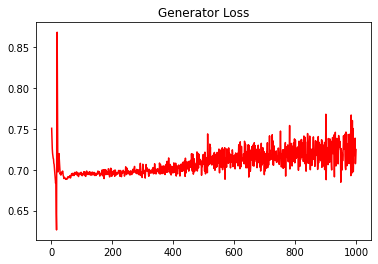

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4900297843791625


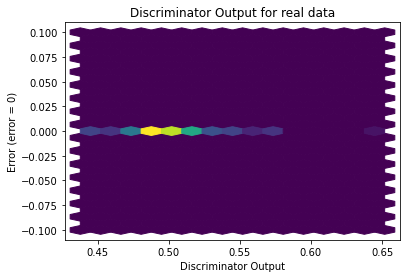

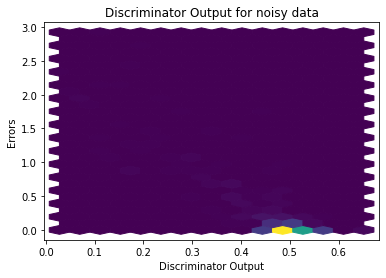

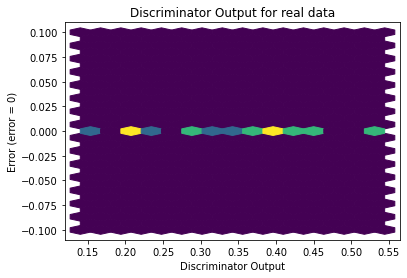

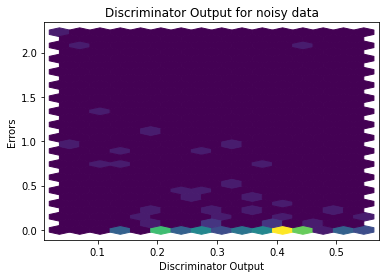

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


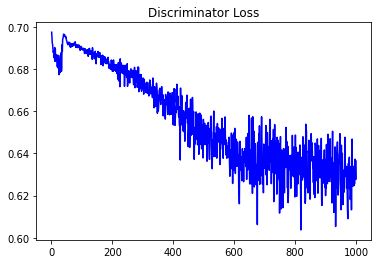

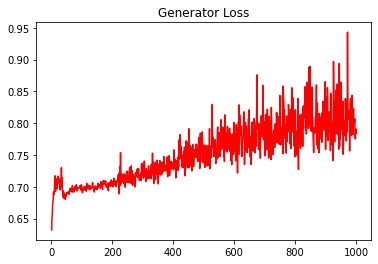

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3875973628775264


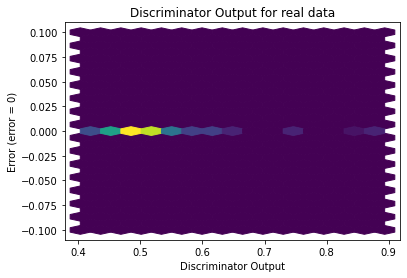

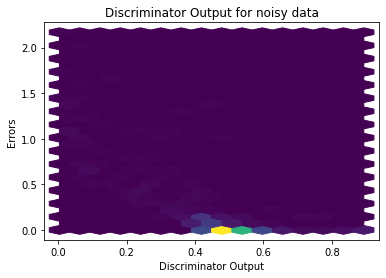

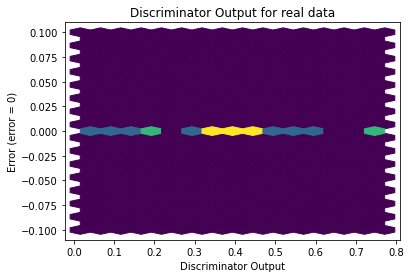

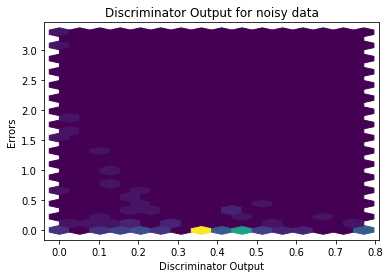

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2384]], requires_grad=True)
